In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv("Confirmed Exoplanet (Planetary System).csv")
df.columns


Index(['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum',
       'discoverymethod', 'disc_year', 'disc_facility', 'soltype',
       'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2',
       'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2',
       'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1',
       'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1',
       'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2',
       'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2

**Check Availability of required features**

In [4]:
# Mapping required features to actual dataset column names
required_cols = {
    "planet_radius": "pl_rade",
    "planet_mass": "pl_bmasse",
    "surface_temperature": "pl_eqt",
    "orbital_period": "pl_orbper",
    "distance_from_star": "pl_orbsmax",
    "host_star_type": "st_spectype",
    "host_star_temperature": "st_teff",
    "host_star_metallicity": "st_met",
}

# Check availability
available = {k: v for k, v in required_cols.items() if v in df.columns}
# Extract available columns
extract_cols = list(available.values())
extracted_df = df[extract_cols]

print("\nExtracted Feature Dataset (first 5 rows):")
print(extracted_df.head())


Extracted Feature Dataset (first 5 rows):
   pl_rade   pl_bmasse  pl_eqt  pl_orbper  pl_orbsmax st_spectype  st_teff  \
0      NaN  6165.60000     NaN  326.03000       1.290      G8 III   4742.0   
1      NaN  5434.70000     NaN        NaN       1.210         NaN      NaN   
2      NaN  4914.89849     NaN  323.21000       1.178      G8 III   4874.0   
3      NaN  4684.81420     NaN  516.21997       1.530         NaN   4213.0   
4      NaN  3337.07000     NaN  516.22000       1.540      K4 III   4340.0   

   st_met  
0   -0.35  
1     NaN  
2   -0.26  
3   -0.02  
4    0.04  


**Drop the rows  with ANY null values**

In [5]:

clean_df = extracted_df.dropna()
print("\nRows before cleaning:", len(extracted_df))
print("Rows after cleaning:", len(clean_df))



Rows before cleaning: 38170
Rows after cleaning: 591


**Save clean dataset**

In [6]:

output_path = "clean_exoplanet_features.csv"
clean_df.to_csv(output_path, index=False)
print(f"\nClean dataset saved successfully to: {output_path}")
print(clean_df.head())


Clean dataset saved successfully to: clean_exoplanet_features.csv
     pl_rade   pl_bmasse  pl_eqt     pl_orbper  pl_orbsmax st_spectype  \
191    2.230    16.30000   546.0  4.168550e+01      0.2410           G   
236   12.442  2002.31896   434.0  4.020000e+08   7506.0000        M3 V   
247   10.870   874.00000   600.0  1.324060e+01      0.1055        K1 V   
250   16.030   740.51000  1657.0  2.994330e+00      0.0436        F6 V   
266    9.920   415.70400  1700.0  4.035190e+00      0.0510        G0 V   

     st_teff  st_met  
191   5766.0   -0.15  
236   3406.0    0.00  
247   5075.0    0.26  
250   6440.0   -0.03  
266   5945.0    0.01  


**Load clean dataset**

In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv("clean_exoplanet_features.csv")


**Outlier handling using IQR (safe & standard)**

In [9]:
numeric_cols = [
    "pl_rade",
    "pl_bmasse",
    "pl_eqt",
    "pl_orbper",
    "pl_orbsmax",
    "st_teff",
    "st_met"
]


In [10]:
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")


In [11]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

for col in numeric_cols:
    df = remove_outliers_iqr(df, col)


**Encode categorical features (One-Hot Encoding)**

In [12]:
df = pd.get_dummies(df, columns=["st_spectype"], prefix="star")


**Feature Engineering**

**A.Habitability Score Index**

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler_mm = MinMaxScaler()

df[["pl_rade_norm", "pl_eqt_norm", "pl_orbsmax_norm"]] = scaler_mm.fit_transform(
    df[["pl_rade", "pl_eqt", "pl_orbsmax"]]
)

df["habitability_index"] = (
    0.4 * (1 - df["pl_rade_norm"]) +
    0.4 * (1 - df["pl_eqt_norm"]) +
    0.2 * (1 - df["pl_orbsmax_norm"])
)


In [14]:
print(df["habitability_index"].describe())


count    444.000000
mean       0.597203
std        0.187865
min        0.144364
25%        0.442212
50%        0.599858
75%        0.766820
max        0.941942
Name: habitability_index, dtype: float64


**B. Stellar Compatibility Index**

In [15]:
# -----------------------------
# Stellar Compatibility Index
# -----------------------------

# Star temperature score (Sun ≈ 5778 K)
df["star_temp_score"] = 1 - abs(df["st_teff"] - 5778) / df["st_teff"].max()

# Star metallicity score (Solar ≈ 0)
df["star_met_score"] = 1 - abs(df["st_met"]) / df["st_met"].abs().max()

# Weighted stellar compatibility index
df["stellar_compatibility_index"] = (
    0.6 * df["star_temp_score"] +
    0.4 * df["star_met_score"]
)

# Ensure score stays within [0, 1]
df["stellar_compatibility_index"] = df["stellar_compatibility_index"].clip(0, 1)


**Normalize numerical features**

In [16]:
# IMPORTANT: DO NOT scale features here!
# The Pipeline's StandardScaler will handle scaling during model training.
# Pre-scaling here causes double-scaling issues when using the model in the API.

# from sklearn.preprocessing import StandardScaler
# 
# scale_cols = [
#      "pl_rade",
#     "pl_bmasse",
#     "pl_eqt",
#     "pl_orbper",
#     "pl_orbsmax",
#     "st_teff",
#     "st_met"]
# 
# scaler = StandardScaler()
# df[scale_cols] = scaler.fit_transform(df[scale_cols])

print("✓ Keeping features in raw form - Pipeline will handle scaling")

✓ Keeping features in raw form - Pipeline will handle scaling


**Validate data quality (Statistics & Visualization)**

Note: Features are kept in raw form (unscaled) so the Pipeline's StandardScaler can learn proper scaling parameters.

          pl_rade   pl_bmasse       pl_eqt   pl_orbper  pl_orbsmax  \
count  444.000000  444.000000   444.000000  444.000000  444.000000   
mean     8.709676  172.351725  1185.581081    4.756415    0.049257   
std      6.118278  203.076964   504.144762    3.455008    0.022872   
min      0.540000    0.400000   272.000000    0.179715    0.005800   
25%      2.285250    8.075000   750.000000    2.537523    0.033864   
50%     10.071000   92.645265  1160.000000    3.692159    0.045705   
75%     13.899000  278.099075  1567.750000    5.943514    0.061000   
max     21.185000  854.962700  2508.000000   18.801611    0.113000   

           st_teff      st_met  pl_rade_norm  pl_eqt_norm  pl_orbsmax_norm  \
count   444.000000  444.000000    444.000000   444.000000       444.000000   
mean   5109.429730    0.035032      0.395722     0.408578         0.405384   
std    1039.814095    0.214021      0.296356     0.225467         0.213358   
min    2850.000000   -0.500000      0.000000     0.000000

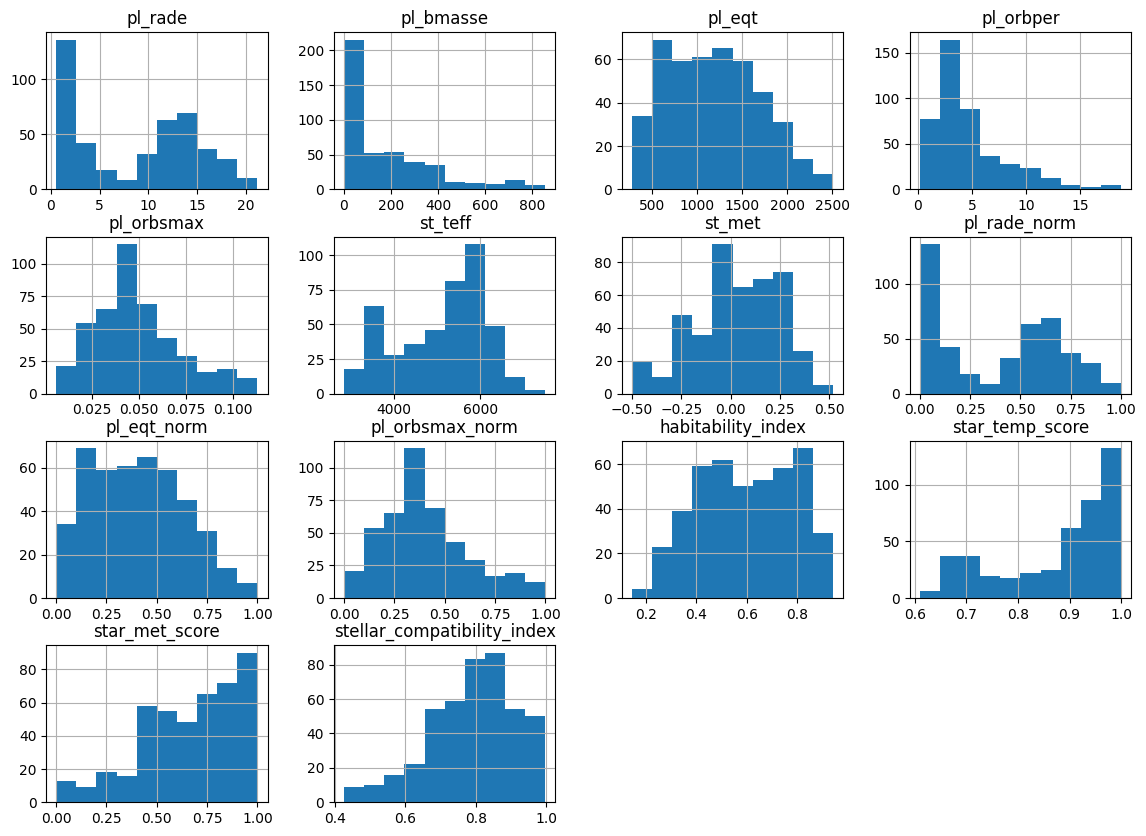

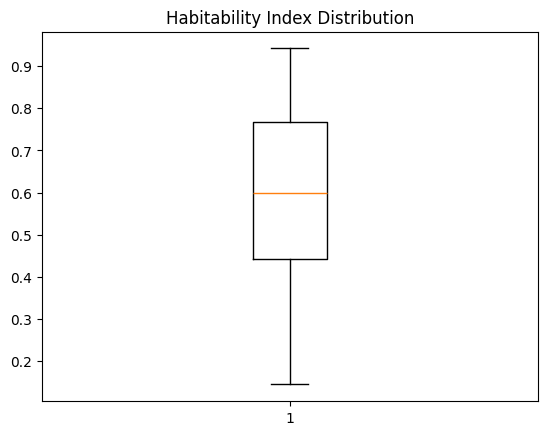

In [18]:
import matplotlib.pyplot as plt

# Statistics
print(df.describe())

# Histograms
df.hist(figsize=(14, 10))
plt.show()

# Boxplot for habitability
plt.boxplot(df["habitability_index"])
plt.title("Habitability Index Distribution")
plt.show()


**Save the final processed dataset**

In [19]:
# Save with RAW features (not scaled)
# This ensures compatibility with the API which receives raw values
df.to_csv("processed_exoplanet_features.csv", index=False)
print("Module 2 completed & dataset saved (RAW features)")

Module 2 completed & dataset saved (RAW features)


**Define Target Variable**

In [20]:
# Define target (harder classification)
threshold = df["habitability_index"].quantile(0.60)
df["habitability_class"] = (df["habitability_index"] >= threshold).astype(int)

print("Threshold:", threshold)
print(df["habitability_class"].value_counts())


Threshold: 0.6742440675190116
habitability_class
0    266
1    178
Name: count, dtype: int64


**Feature Selection using Correlation**




In [21]:
selected_features = [
    "pl_rade", 
    "pl_bmasse", 
    "pl_orbper", 
    "pl_eqt", 
    "pl_orbsmax", 
    "st_teff", 
    "st_met"
]

X = df[selected_features]
y = df["habitability_class"]

print("Features used:", X.columns.tolist())


Features used: ['pl_rade', 'pl_bmasse', 'pl_orbper', 'pl_eqt', 'pl_orbsmax', 'st_teff', 'st_met']


**Train–Test Split (80:20)**

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


**ML Pipeline (Scaling + Model)**

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


**Models for Habitability Prediction**





**CROSS-VALIDATION**

In [24]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import numpy as np


In [25]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [26]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_scores = cross_val_score(
    rf, X, y,
    cv=cv,
    scoring='accuracy'
)

print("Random Forest CV Accuracy:", rf_scores)
print("Random Forest Mean Accuracy:", np.mean(rf_scores))


Random Forest CV Accuracy: [0.94382022 0.97752809 0.97752809 0.93258427 0.93181818]
Random Forest Mean Accuracy: 0.9526557711950969


In [27]:
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

xgb_scores = cross_val_score(
    xgb, X, y,
    cv=cv,
    scoring='accuracy'
)

print("XGBoost CV Accuracy:", xgb_scores)
print("XGBoost Mean Accuracy:", np.mean(xgb_scores))


XGBoost CV Accuracy: [0.95505618 0.97752809 0.97752809 0.94382022 0.93181818]
XGBoost Mean Accuracy: 0.957150153217569


In [29]:
lr = LogisticRegression(
    max_iter=1000,
    solver='liblinear'
)

lr_scores = cross_val_score(
    lr, X, y,
    cv=cv,
    scoring='accuracy'
)

print("Logistic Regression CV Accuracy:", lr_scores)
print("Logistic Regression Mean Accuracy:", np.mean(lr_scores))


Logistic Regression CV Accuracy: [0.94382022 0.95505618 0.96629213 0.92134831 0.92045455]
Logistic Regression Mean Accuracy: 0.941394279877426


In [30]:
print("\nModel Comparison (Mean CV Accuracy)")
print("Random Forest       :", np.mean(rf_scores))
print("XGBoost             :", np.mean(xgb_scores))
print("Logistic Regression :", np.mean(lr_scores))



Model Comparison (Mean CV Accuracy)
Random Forest       : 0.9526557711950969
XGBoost             : 0.957150153217569
Logistic Regression : 0.941394279877426


**After cross validation**


**Random Forest Results**



In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

rf_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RandomForestClassifier(
        n_estimators=80,
        max_depth=3,
        min_samples_split=12,
        min_samples_leaf=8,
        max_features="sqrt",
        random_state=42,
        class_weight="balanced"
    ))
])

rf_pipeline.fit(X_train, y_train)

rf_pred = rf_pipeline.predict(X_test)
rf_prob = rf_pipeline.predict_proba(X_test)[:, 1]

print("\nRandom Forest Results")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred))
print("Recall:", recall_score(y_test, rf_pred))
print("F1-score:", f1_score(y_test, rf_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf_prob))


Random Forest Results
Accuracy: 0.8876404494382022
Precision: 0.8611111111111112
Recall: 0.8611111111111112
F1-score: 0.8611111111111112
ROC-AUC: 0.9727463312368972


**XGBoostClassifier**

In [32]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

xgb_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", XGBClassifier(
        n_estimators=100,
        max_depth=4,
        learning_rate=0.08,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="binary:logistic",
        eval_metric="logloss",
        random_state=42
    ))
])

xgb_pipeline.fit(X_train, y_train)

xgb_pred = xgb_pipeline.predict(X_test)
xgb_prob = xgb_pipeline.predict_proba(X_test)[:, 1]

print("\nXGBoost ")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Precision:", precision_score(y_test, xgb_pred))
print("Recall:", recall_score(y_test, xgb_pred))
print("F1-score:", f1_score(y_test, xgb_pred))
print("ROC-AUC:", roc_auc_score(y_test, xgb_prob))



XGBoost 
Accuracy: 0.9438202247191011
Precision: 0.9696969696969697
Recall: 0.8888888888888888
F1-score: 0.927536231884058
ROC-AUC: 0.9942348008385744


**Logistic Regression Results**

In [33]:
from sklearn.linear_model import LogisticRegression

lr_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(
        C=0.5,
        penalty="l2",
        max_iter=1000
    ))
])

lr_pipeline.fit(X_train, y_train)

lr_pred = lr_pipeline.predict(X_test)
lr_prob = lr_pipeline.predict_proba(X_test)[:, 1]

print("\nLogistic Regression Results")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Precision:", precision_score(y_test, lr_pred))
print("Recall:", recall_score(y_test, lr_pred))
print("F1-score:", f1_score(y_test, lr_pred))
print("ROC-AUC:", roc_auc_score(y_test, lr_prob))



Logistic Regression Results
Accuracy: 0.9775280898876404
Precision: 0.9722222222222222
Recall: 0.9722222222222222
F1-score: 0.9722222222222222
ROC-AUC: 0.9937106918238994


c:\Users\aman rahangdale\Downloads\ExoHabitAI\ExoHabitAI\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


**Rank Exoplanets by Predicted Habitability**

In [34]:
# Use Random Forest probabilities for ranking
df["predicted_habitability_score"] = rf_pipeline.predict_proba(X)[:, 1]

ranked_planets = df.sort_values(
    by="predicted_habitability_score",
    ascending=False
)

print("\nTop 10 Most Habitable Exoplanets (Predicted):")
print(ranked_planets[[

    "predicted_habitability_score",
    "habitability_index",
    "stellar_compatibility_index"
]].head(10))



Top 10 Most Habitable Exoplanets (Predicted):
     predicted_habitability_score  habitability_index  \
261                      0.995402            0.871953   
260                      0.994568            0.875382   
387                      0.994568            0.854268   
136                      0.993759            0.851997   
460                      0.993680            0.820506   
259                      0.992437            0.892157   
258                      0.992437            0.887464   
54                       0.992335            0.870403   
51                       0.992012            0.820951   
50                       0.992012            0.811947   

     stellar_compatibility_index  
261                     0.426105  
260                     0.457114  
387                     0.512400  
136                     0.511231  
460                     0.680634  
259                     0.426105  
258                     0.457114  
54                      0.555286  
51        

 Save Final Ranked Dataset

In [35]:
ranked_planets.to_csv("ranked_exoplanet_habitability.csv", index=False)
print("Module 3 & 4 completed. Ranked dataset saved.")


Module 3 & 4 completed. Ranked dataset saved.


In [36]:
import joblib

# Save the trained pipeline (includes StandardScaler + RandomForest)
joblib.dump(rf_pipeline, "habitability_model.pkl")

# No need to save scaler separately - it's inside the pipeline!
# joblib.dump(scaler, "scaler.pkl")  # REMOVED - not needed

print("✓ Model saved to habitability_model.pkl")
print("✓ Pipeline includes: StandardScaler → RandomForestClassifier")
print("✓ Ready to use with raw input values in the API")

✓ Model saved to habitability_model.pkl
✓ Pipeline includes: StandardScaler → RandomForestClassifier
✓ Ready to use with raw input values in the API
